# Titanic Dataset Analysis

This notebook provides an exploratory analysis of the Titanic dataset using Python, pandas, matplotlib, and seaborn.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##  Handle Missing Values

Identify columns with missing values and handle them appropriately.

In [13]:
print(df.isnull().sum())
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


C:\Users\amras\AppData\Local\Temp\ipykernel_25572\172798493.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\amras\AppData\Local\Temp\ipykernel_25572\172798493.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

## Survival Rate by Passenger Class

C:\Users\amras\AppData\Local\Temp\ipykernel_25572\3389642395.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\amras\AppData\Local\Temp\ipykernel_25572\3389642395.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


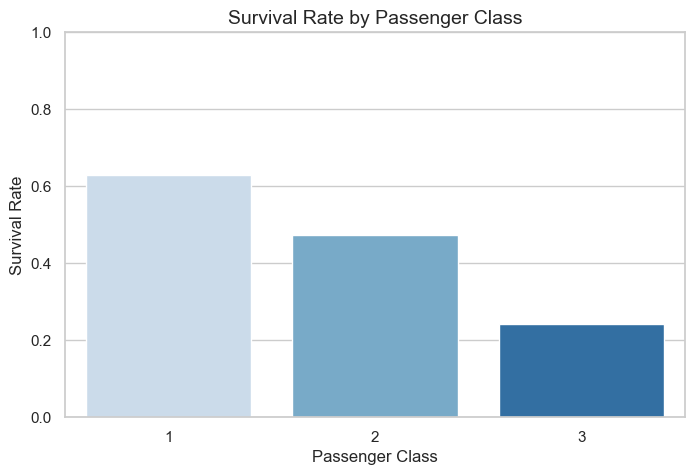

In [ ]:
sns.set(style="whitegrid")


plt.figure(figsize=(8,5))
sns.barplot(
    data=df, 
    x='Pclass', 
    y='Survived', 
    palette='Blues', 
    ci=None
)
plt.title('Survival Rate by Passenger Class', fontsize=14)
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.ylim(0, 1)  # Survival rate is between 0 and 1
plt.show()


## Survival Rate by Gender

C:\Users\amras\AppData\Local\Temp\ipykernel_25572\3358796501.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\amras\AppData\Local\Temp\ipykernel_25572\3358796501.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


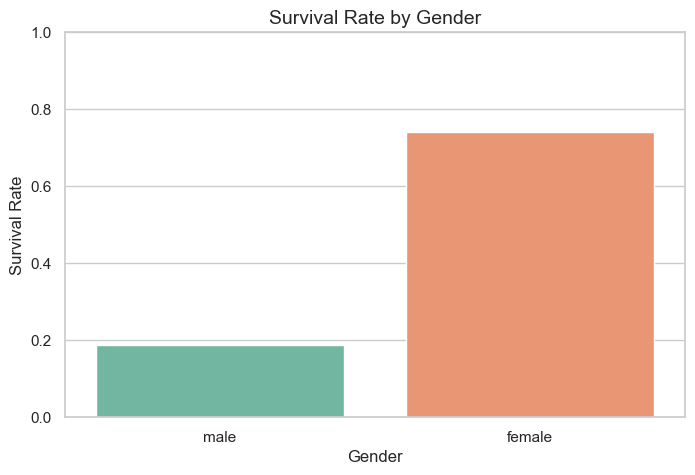

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df, 
    x='Sex', 
    y='Survived', 
    palette='Set2', 
    ci=None
)
plt.title('Survival Rate by Gender', fontsize=14)
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.show()

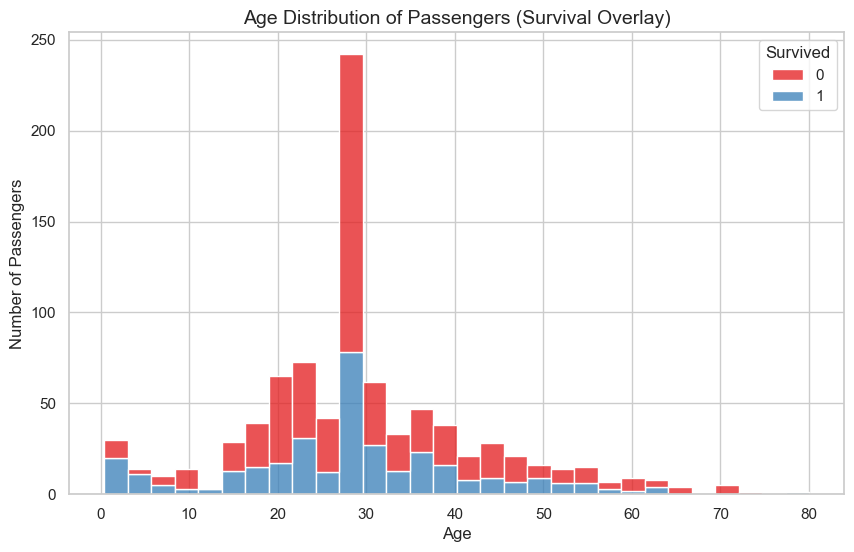

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x='Age',
    hue='Survived',
    multiple='stack',   # Stack bars for survival groups
    bins=30,
    palette='Set1'
)
plt.title('Age Distribution of Passengers (Survival Overlay)', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

## Fare Distribution by Survival Status

C:\Users\amras\AppData\Local\Temp\ipykernel_25572\2763702569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


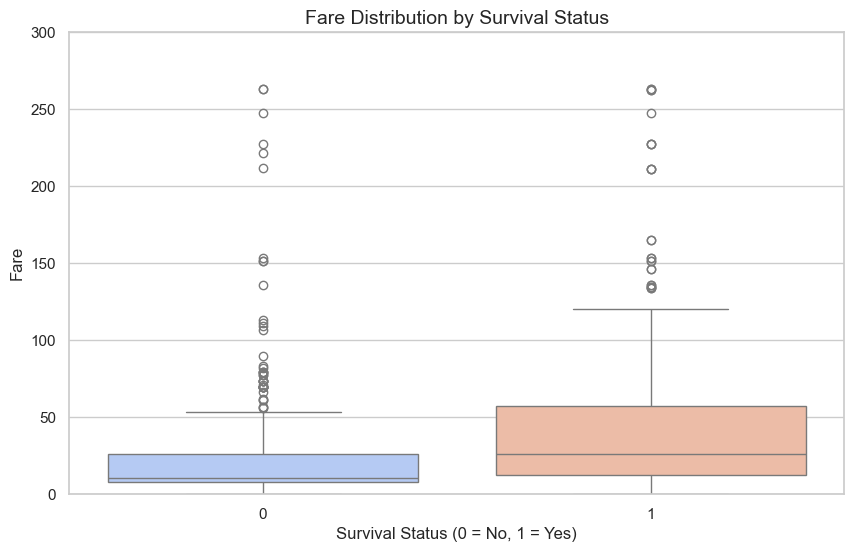

In [20]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(
    data=df,
    x='Survived',
    y='Fare',
    palette='coolwarm'
)
ax.set_title('Fare Distribution by Survival Status', fontsize=14)
ax.set_xlabel('Survival Status (0 = No, 1 = Yes)')
ax.set_ylabel('Fare')


ax.set_ylim(0, 300)

plt.show()

## Survival Rate by Embarkation Port

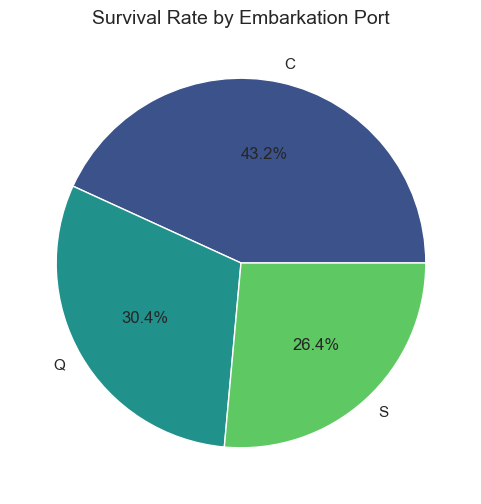

In [22]:
embark_survival = df.groupby('Embarked')['Survived'].mean()
plt.figure(figsize=(6,6))
plt.pie(
    embark_survival,
    labels=embark_survival.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('viridis', len(embark_survival))
)
plt.title('Survival Rate by Embarkation Port', fontsize=14)
plt.show()


## Survival Rate by Family Size

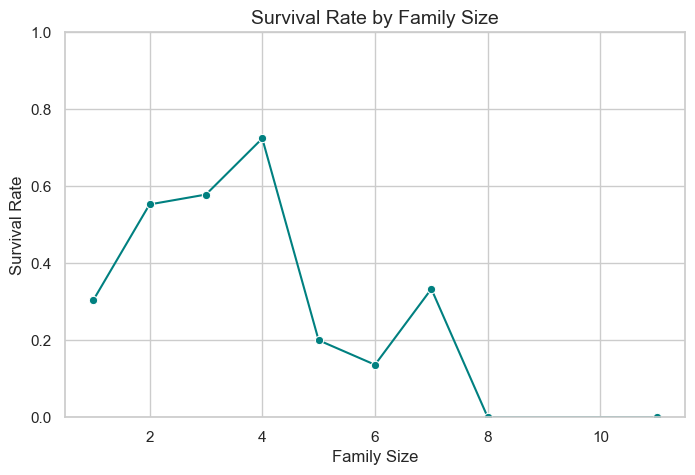

In [23]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Include the passenger themselves
family_survival = df.groupby('FamilySize')['Survived'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(
    data=family_survival,
    x='FamilySize',
    y='Survived',
    marker='o',
    color='teal'
)
plt.title('Survival Rate by Family Size', fontsize=14)
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.show()

## Passenger Counts by Fare Range & Survival

C:\Users\amras\AppData\Local\Temp\ipykernel_25572\1650080700.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival_counts = df.groupby(['FareRange', 'Survived']).size().unstack(fill_value=0)


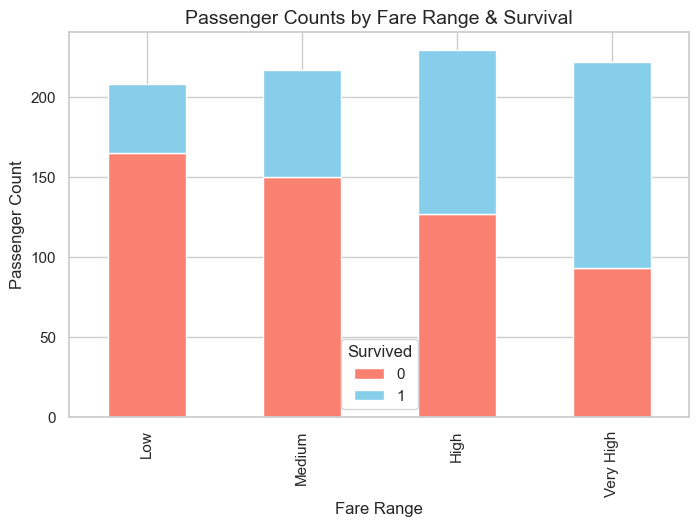

In [28]:
fare_bins = [0, 7.91, 14.45, 31, np.inf]
fare_labels = ['Low', 'Medium', 'High', 'Very High']
df['FareRange'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)

fare_survival_counts = df.groupby(['FareRange', 'Survived']).size().unstack(fill_value=0)
fare_survival_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(8,5),
    color=['salmon', 'skyblue']
)
plt.title('Passenger Counts by Fare Range & Survival', fontsize=14)
plt.xlabel('Fare Range')
plt.ylabel('Passenger Count')
plt.show()

## Fare Distribution by Passenger Class

C:\Users\amras\AppData\Local\Temp\ipykernel_25572\3758559590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


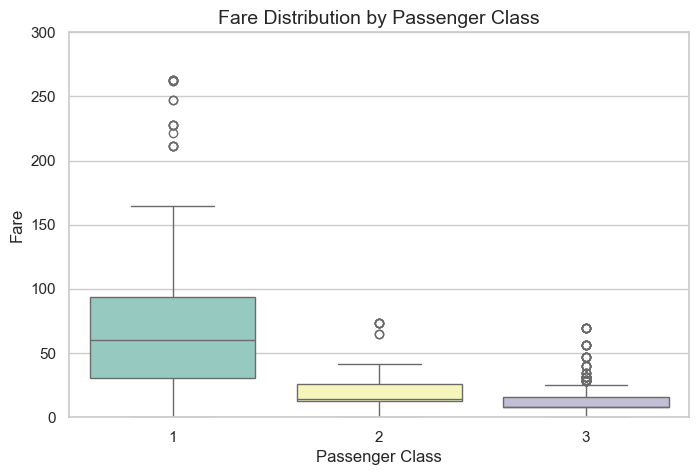

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='Pclass',
    y='Fare',
    palette='Set3'
)
plt.title('Fare Distribution by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.ylim(0, 300)  # To keep outliers from stretching the plot
plt.show()

## Survival Rate by Age Group and Passenger Class

C:\Users\amras\AppData\Local\Temp\ipykernel_25572\2174691915.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(


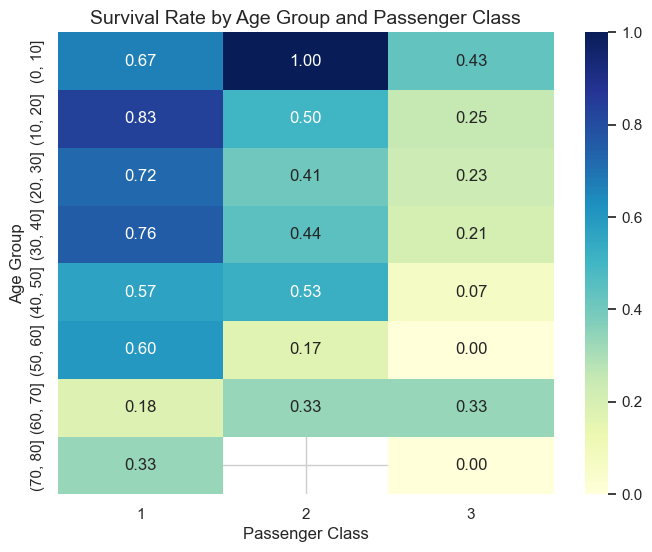

In [30]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)

# Pivot table for survival rate
heatmap_data = df.pivot_table(
    index='AgeGroup',
    columns='Pclass',
    values='Survived',
    aggfunc='mean'
)

plt.figure(figsize=(8,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap='YlGnBu'
)
plt.title('Survival Rate by Age Group and Passenger Class', fontsize=14)
plt.ylabel('Age Group')
plt.xlabel('Passenger Class')
plt.show()